# Pre-Processing

## Library + import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
btc_df = pd.read_csv("C:/Users/USER/Documents/ITERA/Semester 7/SKRIPSI/A TERBARU/Code dan Data/bitcoin_data_2018_2025.csv")
fng_df = pd.read_csv("C:/Users/USER/Documents/ITERA/Semester 7/SKRIPSI/A TERBARU/Code dan Data/Data FNG.csv")

## Persiapan data

### Ubah data jadi format time series

In [3]:
btc_df['Date'] = pd.to_datetime(btc_df['Date']) #ubah jadi tipe datetime
btc_df = btc_df[['Date', 'Close', 'High', 'Low', 'Open', 'Volume']].sort_values('Date').reset_index(drop=True)

fng_df['Date'] = pd.to_datetime(fng_df['Date'])
fng_df = fng_df[['Date', 'FNG']].sort_values('Date').reset_index(drop=True)

### Gabungkan data dengan kolom Date

In [4]:
df_merged = pd.merge(btc_df, fng_df, on='Date', how='inner')

In [5]:
df_merged

,Date,Close,High,Low,Open,Volume,FNG
0,2018-02-02,8830.750000,9142.280273,7796.490234,9142.280273,1.272690e+10,15
1,2018-02-03,9174.910156,9430.750000,8251.629883,8852.120117,7.263790e+09,40
2,2018-02-04,8277.009766,9334.870117,8031.220215,9175.700195,7.073550e+09,24
3,2018-02-05,6955.270020,8364.839844,6756.680176,8270.540039,9.285290e+09,11
4,2018-02-06,7754.000000,7850.700195,6048.259766,7051.750000,1.399980e+10,8
...,...,...,...,...,...,...,...
2666,2025-05-26,109440.367200,110376.882800,108735.640600,109023.781300,4.595046e+10,73
2667,2025-05-27,108994.640600,110744.210900,107609.554700,109440.406300,5.745018e+10,74
2668,2025-05-28,107802.328100,109298.289100,106812.929700,108992.171900,4.915538e+10,71
2669,2025-05-29,105641.757800,108910.046900,105374.398400,107795.570300,5.602275e+10,74


### Analisis data eksploratif

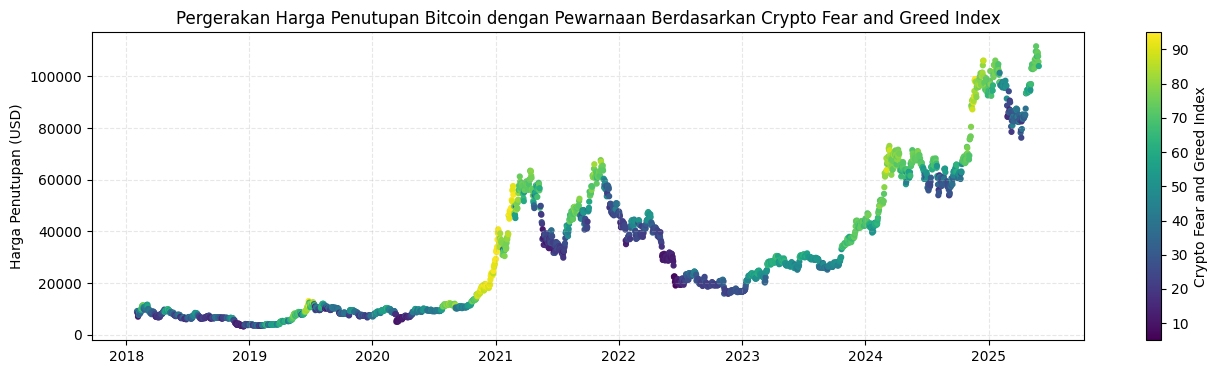

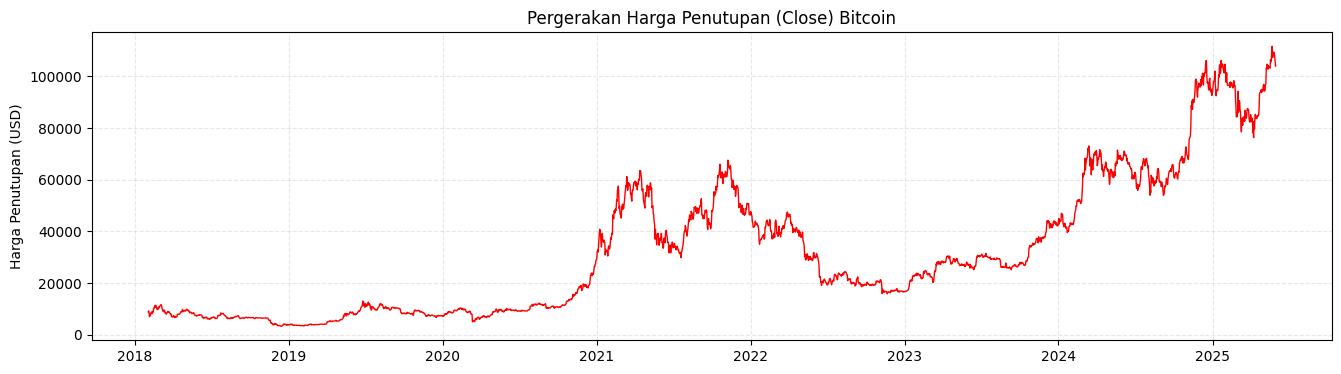

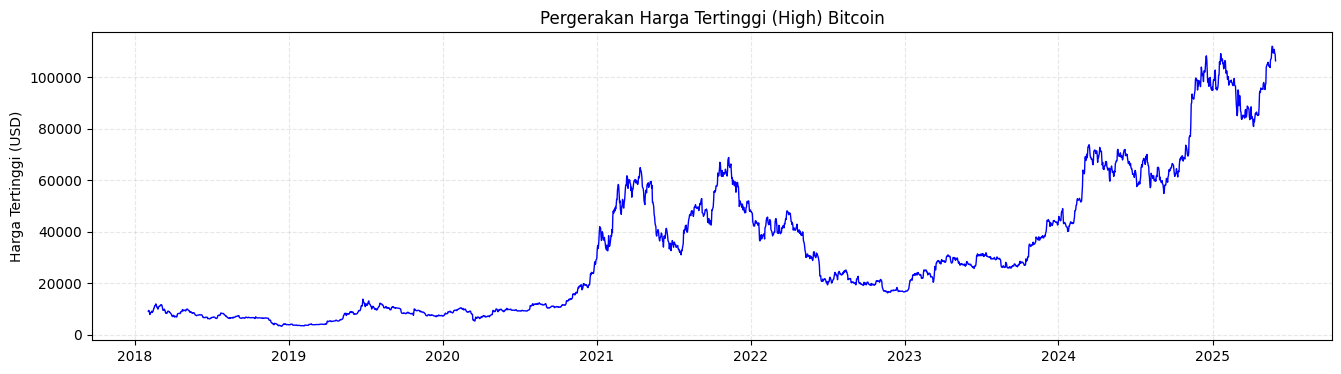

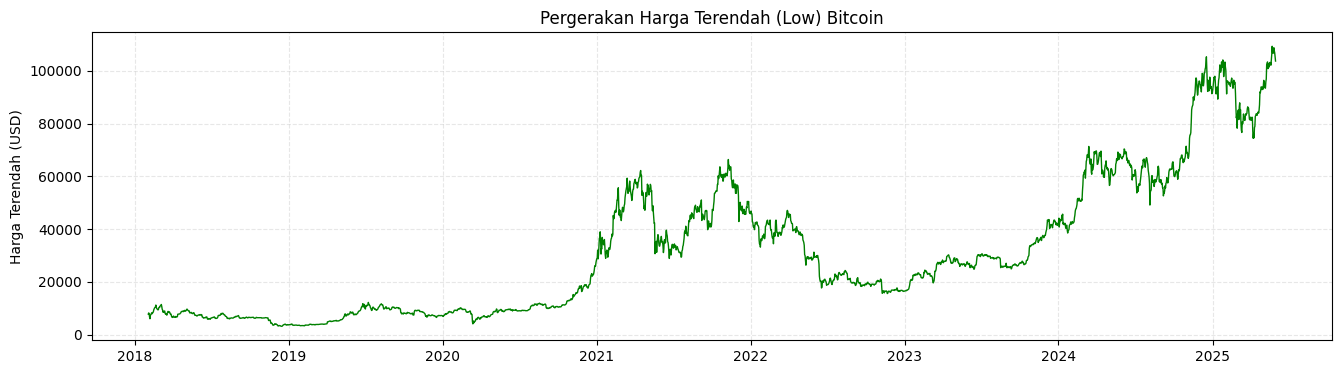

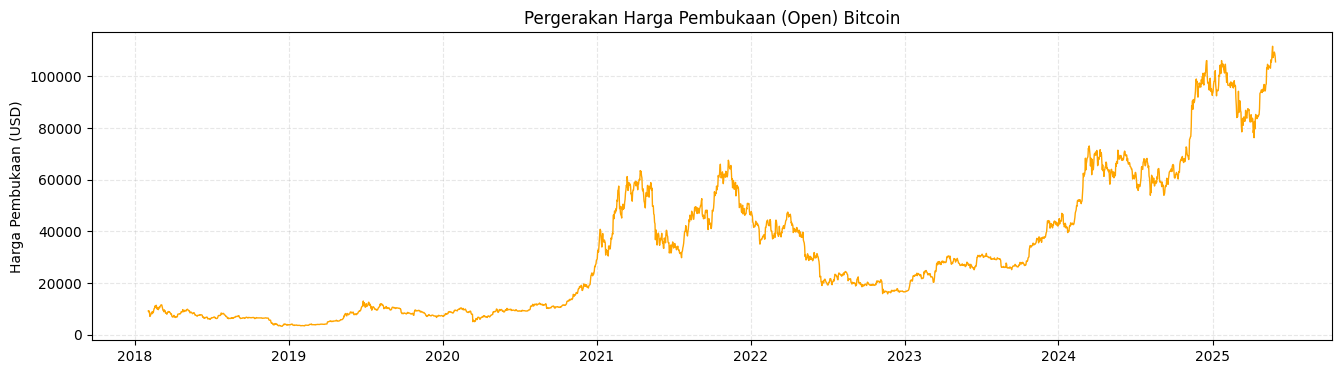

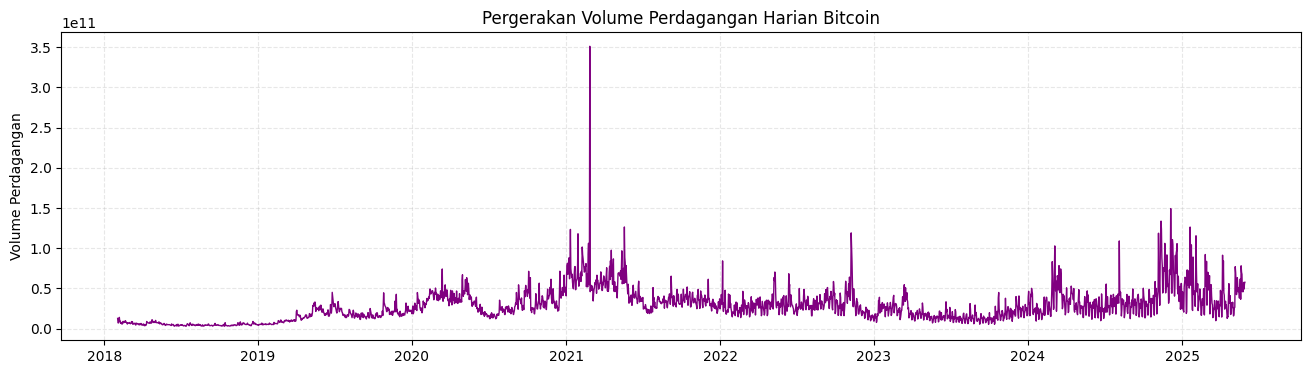

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Close diwarnai FNG
plt.figure(figsize=(16, 4))
plt.scatter(df_merged['Date'], df_merged['Close'],
            c=df_merged['FNG'], cmap='viridis', s=12)
plt.colorbar(label='Crypto Fear and Greed Index')
plt.ylabel("Harga Penutupan (USD)")
plt.title("Pergerakan Harga Penutupan Bitcoin dengan Pewarnaan Berdasarkan Crypto Fear and Greed Index")
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()

# 2. Close biasa
plt.figure(figsize=(16, 4))
plt.plot(df_merged['Date'], df_merged['Close'], color='red', linewidth=1)
plt.ylabel("Harga Penutupan (USD)")
plt.title("Pergerakan Harga Penutupan (Close) Bitcoin")
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()

# 3. High
plt.figure(figsize=(16, 4))
plt.plot(df_merged['Date'], df_merged['High'], color='blue', linewidth=1)
plt.ylabel("Harga Tertinggi (USD)")
plt.title("Pergerakan Harga Tertinggi (High) Bitcoin")
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()

# 4. Low
plt.figure(figsize=(16, 4))
plt.plot(df_merged['Date'], df_merged['Low'], color='green', linewidth=1)
plt.ylabel("Harga Terendah (USD)")
plt.title("Pergerakan Harga Terendah (Low) Bitcoin")
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()

# 5. Open
plt.figure(figsize=(16, 4))
plt.plot(df_merged['Date'], df_merged['Open'], color='orange', linewidth=1)
plt.ylabel("Harga Pembukaan (USD)")
plt.title("Pergerakan Harga Pembukaan (Open) Bitcoin")
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()

# 6. Volume
plt.figure(figsize=(16, 4))
plt.plot(df_merged['Date'], df_merged['Volume'], color='purple', linewidth=1)
plt.ylabel("Volume Perdagangan")
plt.title("Pergerakan Volume Perdagangan Harian Bitcoin")
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()


NameError: name 'mdates' is not defined

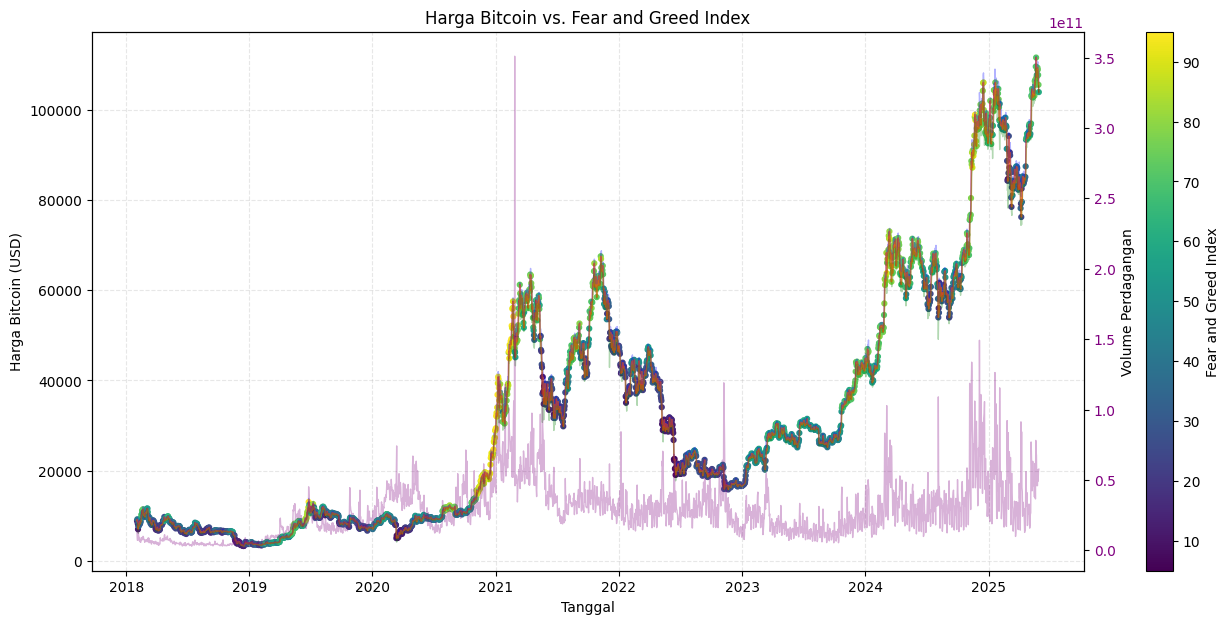

In [5]:
fig, ax1 = plt.subplots(figsize=(16, 7))

# Plot garis pergerakan asli bitcoin dengan opacity tipis
ax1.plot(df_merged['Date'], df_merged['Close'], color='red', linestyle='-', linewidth=1, alpha=0.6, label='Close')
ax1.plot(df_merged['Date'], df_merged['High'], color='blue', linestyle='-', linewidth=1, alpha=0.3, label='High')
ax1.plot(df_merged['Date'], df_merged['Low'], color='green', linestyle='-', linewidth=1, alpha=0.3, label='Low')
ax1.plot(df_merged['Date'], df_merged['Open'], color='orange', linestyle='-', linewidth=1, alpha=0.3, label='Open')

# Scatter plot for Fear and Greed Index on the primary y-axis
scatter = ax1.scatter(
    df_merged['Date'],
    df_merged['Close'], # Scatter on Close price for context
    c=df_merged['FNG'],
    cmap='viridis',
    s=12,
    label='Fear and Greed Index'
)
plt.colorbar(scatter, label='Fear and Greed Index')


ax1.set_title("Harga Bitcoin vs. Fear and Greed Index")
ax1.set_xlabel("Tanggal")
ax1.set_ylabel("Harga Bitcoin (USD)")
ax1.grid(True, linestyle='--', alpha=0.3)

# Create a second y-axis for Volume
ax2 = ax1.twinx()
ax2.plot(df_merged['Date'], df_merged['Volume'], color='purple', linestyle='-', linewidth=1, alpha=0.3, label='Volume')
ax2.set_ylabel("Volume Perdagangan")
ax2.tick_params(axis='y', labelcolor='purple')

# Format tanggal agar rapi
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_major_locator(mdates.YearLocator())

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

### Analisis Korelasi

#### Korelasi Global

In [6]:
from scipy.stats import pearsonr

correlation_matrix = df_merged[['Close', 'High', 'Low', 'Open', 'Volume', 'FNG']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate p-values for correlation between FNG and other columns
print("\nP-values for correlation with FNG:")
for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
  correlation, p_value = pearsonr(df_merged['FNG'], df_merged[col])
  print(f"FNG vs {col}: p-value = {p_value:.2e}")

Correlation Matrix:
           Close      High       Low      Open    Volume       FNG
Close   1.000000  0.999534  0.999413  0.998903  0.497301  0.381759
High    0.999534  1.000000  0.999088  0.999481  0.506587  0.381025
Low     0.999413  0.999088  1.000000  0.999272  0.484249  0.381963
Open    0.998903  0.999481  0.999272  1.000000  0.497455  0.381089
Volume  0.497301  0.506587  0.484249  0.497455  1.000000  0.311303
FNG     0.381759  0.381025  0.381963  0.381089  0.311303  1.000000

P-values for correlation with FNG:
FNG vs Close: p-value = 2.06e-93
FNG vs High: p-value = 4.94e-93
FNG vs Low: p-value = 1.61e-93
FNG vs Open: p-value = 4.57e-93
FNG vs Volume: p-value = 4.14e-61


#### Korelasi Per Bulan

Korelasi global antara fng dan fitur internal bitcoin sangat lemah, hal ini karena korelasi ini adalah rata-rata, sehingga perlu diketahu bagaimana korelasi ini dalam bulanan

In [7]:
df_merged['Month'] = df_merged['Date'].dt.to_period('M')

monthly_corrs = (
    df_merged.groupby('Month').apply(lambda g: pd.Series({
        'corr_fgi_open': g['FNG'].corr(g['Open']),
        'corr_fgi_high': g['FNG'].corr(g['High']),
        'corr_fgi_low': g['FNG'].corr(g['Low']),
        'corr_fgi_close': g['FNG'].corr(g['Close']),
        'corr_fgi_volume': g['FNG'].corr(g['Volume'])
    }))
).reset_index()

df_merged = pd.merge(df_merged, monthly_corrs, on='Month', how='left')

df_merged.drop(columns=['Month'], inplace=True)

df_merged.fillna(0, inplace=True)  

C:\Users\USER\AppData\Local\Temp\ipykernel_30396\1941170361.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_merged.groupby('Month').apply(lambda g: pd.Series({


In [31]:
df_merged.head(5)

,Date,Close,High,Low,Open,Volume,FNG,corr_fgi_open,corr_fgi_high,corr_fgi_low,corr_fgi_close,corr_fgi_volume
0,2018-02-02,8830.750000,9142.280273,7796.490234,9142.280273,1.272690e+10,15,0.584903,0.688962,0.737152,0.756168,-0.212753
1,2018-02-03,9174.910156,9430.750000,8251.629883,8852.120117,7.263790e+09,40,0.584903,0.688962,0.737152,0.756168,-0.212753
2,2018-02-04,8277.009766,9334.870117,8031.220215,9175.700195,7.073550e+09,24,0.584903,0.688962,0.737152,0.756168,-0.212753
3,2018-02-05,6955.270020,8364.839844,6756.680176,8270.540039,9.285290e+09,11,0.584903,0.688962,0.737152,0.756168,-0.212753
4,2018-02-06,7754.000000,7850.700195,6048.259766,7051.750000,1.399980e+10,8,0.584903,0.688962,0.737152,0.756168,-0.212753


In [8]:
monthly_corrs.to_csv('monthly_corrs.csv', index=False)

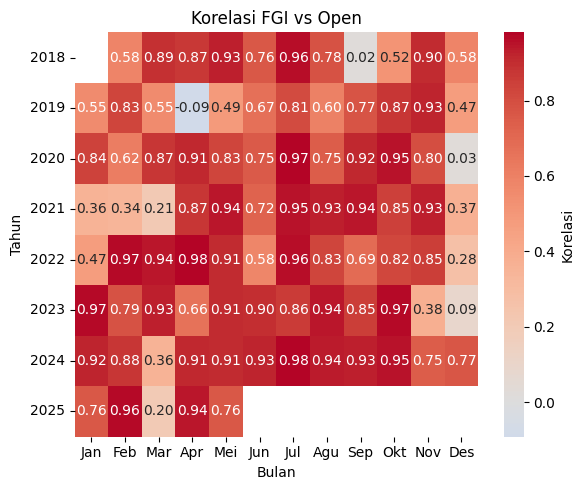

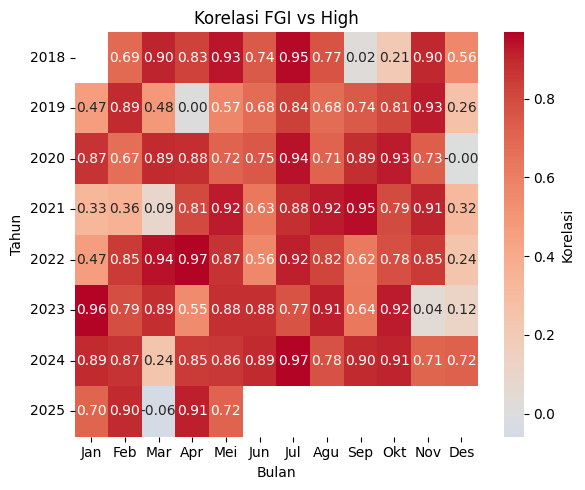

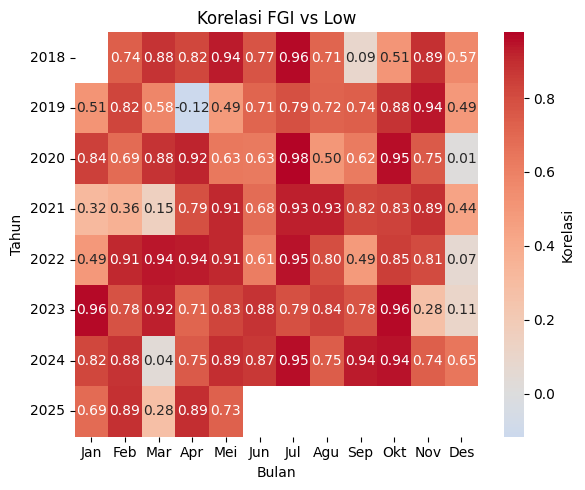

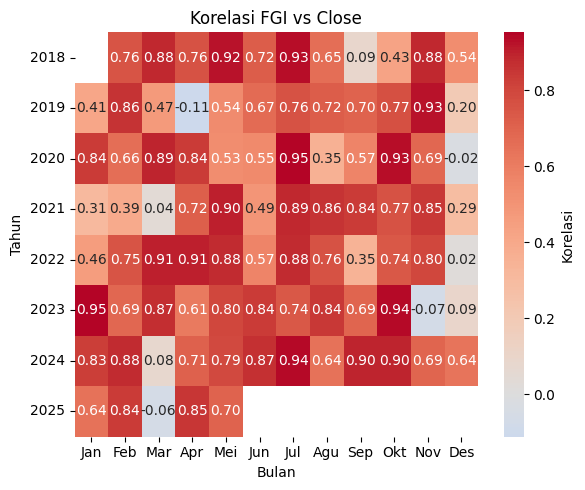

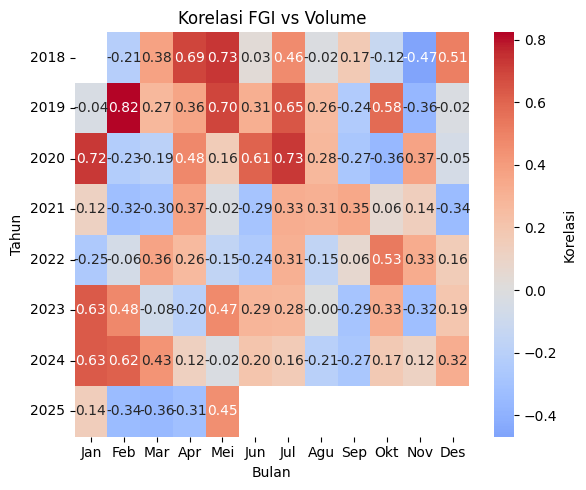

In [9]:
monthly_corrs['Month'] = monthly_corrs['Month'].astype(str)
monthly_corrs['Month'] = pd.to_datetime(monthly_corrs['Month']) 
monthly_corrs['Year'] = monthly_corrs['Month'].dt.year
monthly_corrs['Month_Num'] = monthly_corrs['Month'].dt.month

def plot_correlation_matrix(data, column, title):
    pivot = data.pivot(index='Year', columns='Month_Num', values=column)
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        pivot,
        annot=True, fmt=".2f",
        cmap="coolwarm", center=0,
        cbar_kws={'label': 'Korelasi'}
    )
    plt.title(title)
    plt.xlabel('Bulan')
    plt.ylabel('Tahun')
    plt.xticks(ticks=[i-0.5 for i in range(1,13)], labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_correlation_matrix(monthly_corrs, 'corr_fgi_open', 'Korelasi FGI vs Open')
plot_correlation_matrix(monthly_corrs, 'corr_fgi_high', 'Korelasi FGI vs High')
plot_correlation_matrix(monthly_corrs, 'corr_fgi_low', 'Korelasi FGI vs Low')
plot_correlation_matrix(monthly_corrs, 'corr_fgi_close', 'Korelasi FGI vs Close')
plot_correlation_matrix(monthly_corrs, 'corr_fgi_volume', 'Korelasi FGI vs Volume')

### Split & Normalisasi

In [10]:
feature_cols = [
    'Close', 'High', 'Low', 'Open', 'Volume', 'FNG'
]

existing_feature_cols = [col for col in feature_cols if col in df_merged.columns]
data_to_process = df_merged[existing_feature_cols]

n = len(data_to_process)
train_size = int(n * 0.70)
val_size = int(n * 0.10)

train_data = data_to_process.iloc[:train_size]
val_data = data_to_process.iloc[train_size:train_size + val_size]
test_data = data_to_process.iloc[train_size + val_size:]

print(f"Total Data: {len(df_merged)}")
print(f"Data Latih: {len(train_data)}")
print(f"Data Validasi: {len(val_data)}")
print(f"Data Uji: {len(test_data)}")

Total Data: 2671
Data Latih: 1869
Data Validasi: 267
Data Uji: 535


In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_data)
train_normalize = scaler.transform(train_data)
val_normalize = scaler.transform(val_data)
test_normalize = scaler.transform(test_data)

### Windowing, Model Building dan Tuning Parameter.

#### Sliding Window

In [14]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])
    return np.array(X), np.array(y)

#### KerasTuner HyperModels
##### KerasTuner HyperModels encapsulate search space for sharing. They use a `build` method to create a Keras model. Built-in subclasses are also available.

In [15]:
class LSTMHyperModel(kt.HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()

        # Jumlah lapisan LSTM (1-3)
        num_layers = hp.Int("num_lstm_layers", 1, 3)

        for i in range(num_layers):
            return_sequences = i < num_layers - 1
            model.add(LSTM(
                units=hp.Choice(f"units_{i}", [64, 96, 128]),
                return_sequences=return_sequences,
                kernel_regularizer=regularizers.l2(hp.Choice("kernel_reg", [0.0001, 0.001, 0.01])),
                input_shape=self.input_shape if i == 0 else None
            ))
            model.add(Dropout(hp.Choice(f"dropout_{i}", [0.01, 0.1, 0.2])))

        model.add(Dense(1, activation='linear'))

        # Optimizer dan Learning Rate
        learning_rate = hp.Choice("learning_rate", [0.001, 0.01, 0.1])
        optimizer_name = hp.Choice("optimizer", ["adam", "rmsprop"])
        optimizer = Adam(learning_rate) if optimizer_name == "adam" else RMSprop(learning_rate)

        model.compile(
            optimizer=optimizer,
            loss="mean_squared_error",
            metrics=["mean_squared_error"]
        )
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", [32, 64, 128]),
            **kwargs
        )

#### Loop tuning untuk setiap sequence length

In [16]:
sequence_lengths = [7, 14, 21]
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

for seq_len in sequence_lengths:
    X_train, y_train = create_sequences(train_normalize, seq_len)
    X_val, y_val = create_sequences(val_normalize, seq_len)

    input_shape = (X_train.shape[1], X_train.shape[2])
    hypermodel = LSTMHyperModel(input_shape)

    tuner = kt.Hyperband(
        hypermodel,
        objective='val_mean_squared_error',
        max_epochs=150,
        factor=3,
        directory='YES_FNG',
        project_name=f'seq_len_{seq_len}',
        overwrite=False
    )

    tuner.search(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=150,
        callbacks=[early_stop],
        verbose=2
    )

Reloading Tuner from YES_FNG\seq_len_7\tuner0.json
Reloading Tuner from YES_FNG\seq_len_14\tuner0.json
Reloading Tuner from YES_FNG\seq_len_21\tuner0.json


In [17]:
import pandas as pd
from keras_tuner import Hyperband

sequence_lengths = [7, 14, 21]
directory = 'YES_FNG'

best_overall_trial = None
best_score = float('inf')
best_seq_len = None
all_trials = []

for seq_len in sequence_lengths:
    tuner = Hyperband(
        hypermodel=None,
        objective='val_mean_squared_error',
        max_epochs=150,
        factor=3,
        directory=directory,
        project_name=f'seq_len_{seq_len}'
    )

    best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]

    if best_trial.score < best_score:
        best_score = best_trial.score
        best_overall_trial = best_trial
        best_seq_len = seq_len

    for trial in tuner.oracle.trials.values():
        if trial.score is not None:
            trial_data = trial.hyperparameters.values.copy()
            trial_data.update({
                'val_mse': trial.score,
                'sequence_length': seq_len,
                'trial_id': trial.trial_id
            })
            all_trials.append(trial_data)

# Tampilkan model terbaik
print("MODEL TERBAIK DARI SELURUH TUNING:")
print(f"Sequence Length Terbaik: {best_seq_len}")
print(f"Best Validation MSE: {best_score:.6f}")
print("Hyperparameters:")
for hp_name, hp_value in best_overall_trial.hyperparameters.values.items():
    print(f"  {hp_name}: {hp_value}")

# Simpan seluruh hasil tuning ke CSV
df_all_trials = pd.DataFrame(all_trials).sort_values(by='val_mse').reset_index(drop=True)
output_file = "seluruh_hasil_tuning_lstm_fgi.csv"
df_all_trials.to_csv(output_file, index=False)

Reloading Tuner from YES_FNG\seq_len_7\tuner0.json
Reloading Tuner from YES_FNG\seq_len_14\tuner0.json
Reloading Tuner from YES_FNG\seq_len_21\tuner0.json
MODEL TERBAIK DARI SELURUH TUNING:
Sequence Length Terbaik: 7
Best Validation MSE: 0.000102
Hyperparameters:
  num_lstm_layers: 1
  units_0: 128
  kernel_reg: 0.0001
  dropout_0: 0.01
  learning_rate: 0.01
  optimizer: adam
  units_1: 96
  dropout_1: 0.2
  units_2: 64
  dropout_2: 0.2
  batch_size: 64
  tuner/epochs: 150
  tuner/initial_epoch: 50
  tuner/bracket: 4
  tuner/round: 4
  tuner/trial_id: 0142


#### Pelatihan

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
30/30 - 3s - 103ms/step - loss: 0.0272 - mean_squared_error: 0.0257 - val_loss: 0.0029 - val_mean_squared_error: 0.0013
Epoch 2/150
30/30 - 0s - 10ms/step - loss: 0.0022 - mean_squared_error: 8.4834e-04 - val_loss: 0.0013 - val_mean_squared_error: 2.2358e-04
Epoch 3/150
30/30 - 0s - 13ms/step - loss: 0.0015 - mean_squared_error: 5.9105e-04 - val_loss: 9.4423e-04 - val_mean_squared_error: 2.0671e-04
Epoch 4/150
30/30 - 0s - 11ms/step - loss: 0.0012 - mean_squared_error: 5.2279e-04 - val_loss: 8.5001e-04 - val_mean_squared_error: 2.8517e-04
Epoch 5/150
30/30 - 0s - 12ms/step - loss: 0.0010 - mean_squared_error: 5.3256e-04 - val_loss: 7.6328e-04 - val_mean_squared_error: 2.9922e-04
Epoch 6/150
30/30 - 0s - 11ms/step - loss: 9.1513e-04 - mean_squared_error: 4.8422e-04 - val_loss: 5.6489e-04 - val_mean_squared_error: 1.6762e-04
Epoch 7/150
30/30 - 0s - 11ms/step - loss: 8.4559e-04 - mean_squared_error: 4.7140e-04 - val_loss: 5.5301e-04 - val_mean_squared_error: 2.0256e-04
Epoch 

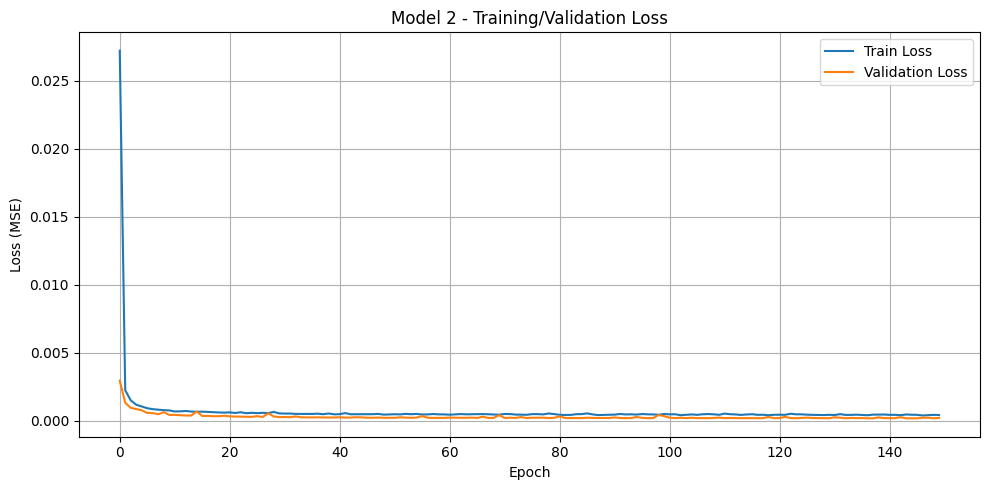

In [18]:
import os
import random

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

X_train, y_train = create_sequences(train_normalize, seq_length=best_seq_len)
X_val, y_val = create_sequences(val_normalize, seq_length=best_seq_len)

# Rekonstruksi HyperParameters
from keras_tuner.engine.hyperparameters import HyperParameters
hp = HyperParameters()
for name, value in best_overall_trial.hyperparameters.values.items():
    hp.values[name] = value

# Bangun model
input_shape = (X_train.shape[1], X_train.shape[2])
hypermodel = LSTMHyperModel(input_shape=input_shape)
final_model = hypermodel.build(hp)

# EarlyStopping seperti saat tuning
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Latih ulang model terbaik
history = final_model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=hp.get('batch_size'),
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=2
)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model 2 - Training/Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Prediksi

In [16]:
from tensorflow.keras.callbacks import Callback

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size': 12, 'figure.titlesize': 18, 'axes.titlesize': 14})

class WeightHistoryCallback(Callback):
    def __init__(self, layer_name):
        super().__init__()
        self.layer_name = layer_name
        self.weights_history = []
    def on_epoch_end(self, epoch, logs=None):
        for layer in self.model.layers:
            if self.layer_name in layer.name:
                self.weights_history.append(layer.get_weights()[0].copy())
                return

test_dates = test_data.index

trainval = np.concatenate([train_normalize, val_normalize], axis=0)
X_trainval, y_trainval = create_sequences(trainval, seq_length=best_seq_len)

hp = HyperParameters()
for name, value in best_overall_trial.hyperparameters.values.items():
    hp.values[name] = value

input_shape = (X_trainval.shape[1], X_trainval.shape[2])
hypermodel = LSTMHyperModel(input_shape=input_shape)
final_model = hypermodel.build(hp)

try:
    lstm_layer_name = [l.name for l in final_model.layers if 'lstm' in l.name.lower()][0]
    weight_callback = WeightHistoryCallback(layer_name=lstm_layer_name)
    callbacks_list = [weight_callback]
except IndexError:
    callbacks_list = []

history = final_model.fit(
    X_trainval, y_trainval,
    epochs=150,
    batch_size=hp.get('batch_size'),
    callbacks=callbacks_list,
    verbose=2
)

X_test, y_test = create_sequences(test_normalize, seq_length=best_seq_len)
y_pred_scaled = final_model.predict(X_test)

def inverse_transform_close_only(y_scaled, scaler):
    dummy_full = np.zeros((len(y_scaled), len(feature_cols)))
    dummy_full[:, 0] = y_scaled.ravel()
    return scaler.inverse_transform(dummy_full)[:, 0]

y_test_actual = inverse_transform_close_only(y_test, scaler)
y_pred_actual = inverse_transform_close_only(y_pred_scaled, scaler)

test_mape = mean_absolute_percentage_error(y_test_actual, y_pred_actual) * 100
print(f"\nMAPE pada Data Uji: {test_mape:.2f}%\n")

Epoch 1/150


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 - 2s - 63ms/step - loss: 0.0307 - mean_squared_error: 0.0292
Epoch 2/150
34/34 - 0s - 8ms/step - loss: 0.0022 - mean_squared_error: 8.7574e-04
Epoch 3/150
34/34 - 0s - 7ms/step - loss: 0.0015 - mean_squared_error: 5.7299e-04
Epoch 4/150
34/34 - 0s - 7ms/step - loss: 0.0012 - mean_squared_error: 5.1674e-04
Epoch 5/150
34/34 - 0s - 10ms/step - loss: 0.0010 - mean_squared_error: 4.8121e-04
Epoch 6/150
34/34 - 0s - 7ms/step - loss: 9.2600e-04 - mean_squared_error: 4.8334e-04
Epoch 7/150
34/34 - 0s - 7ms/step - loss: 8.7531e-04 - mean_squared_error: 4.9173e-04
Epoch 8/150
34/34 - 0s - 7ms/step - loss: 8.0190e-04 - mean_squared_error: 4.6175e-04
Epoch 9/150
34/34 - 0s - 8ms/step - loss: 7.7204e-04 - mean_squared_error: 4.6496e-04
Epoch 10/150
34/34 - 0s - 8ms/step - loss: 7.3854e-04 - mean_squared_error: 4.5670e-04
Epoch 11/150
34/34 - 0s - 9ms/step - loss: 7.0755e-04 - mean_squared_error: 4.4540e-04
Epoch 12/150
34/34 - 0s - 11ms/step - loss: 6.7835e-04 - mean_squared_error: 4.3166e-0

In [21]:
from tensorflow.keras.callbacks import Callback

# Set seed untuk reproduksibilitas
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Konfigurasi style plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size': 12, 'figure.titlesize': 18, 'axes.titlesize': 14})


# Callback untuk merekam bobot kernel dari layer LSTM
class WeightHistoryCallback(Callback):
    def __init__(self, layer_name):
        super().__init__()
        self.layer_name = layer_name
        self.weights_history = []

    def on_epoch_end(self, epoch, logs=None):
        for layer in self.model.layers:
            if self.layer_name in layer.name:
                self.weights_history.append(layer.get_weights()[0].copy())
                return

In [22]:
# Persiapan data train+val untuk pelatihan akhir
test_dates = test_data.index
trainval = np.concatenate([train_normalize, val_normalize], axis=0)
X_trainval, y_trainval = create_sequences(trainval, seq_length=best_seq_len)

# Rekonstruksi HyperParameters dari trial terbaik
hp = HyperParameters()
for name, value in best_overall_trial.hyperparameters.values.items():
    hp.values[name] = value

# Build model final
input_shape = (X_trainval.shape[1], X_trainval.shape[2])
hypermodel = LSTMHyperModel(input_shape=input_shape)
final_model = hypermodel.build(hp)

# Callback untuk melacak bobot LSTM
lstm_layer_name = [l.name for l in final_model.layers if 'lstm' in l.name.lower()][0]
weight_callback = WeightHistoryCallback(layer_name=lstm_layer_name)
callbacks_list = [weight_callback]

# Training model final
history = final_model.fit(
    X_trainval, y_trainval,
    epochs=150,
    batch_size=hp.get('batch_size'),
    callbacks=callbacks_list,
    verbose=2
)

Epoch 1/150


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 - 2s - 61ms/step - loss: 0.0307 - mean_squared_error: 0.0292
Epoch 2/150
34/34 - 1s - 19ms/step - loss: 0.0022 - mean_squared_error: 8.7574e-04
Epoch 3/150
34/34 - 0s - 8ms/step - loss: 0.0015 - mean_squared_error: 5.7299e-04
Epoch 4/150
34/34 - 0s - 8ms/step - loss: 0.0012 - mean_squared_error: 5.1674e-04
Epoch 5/150
34/34 - 0s - 7ms/step - loss: 0.0010 - mean_squared_error: 4.8121e-04
Epoch 6/150
34/34 - 0s - 9ms/step - loss: 9.2600e-04 - mean_squared_error: 4.8334e-04
Epoch 7/150
34/34 - 0s - 8ms/step - loss: 8.7531e-04 - mean_squared_error: 4.9173e-04
Epoch 8/150
34/34 - 0s - 6ms/step - loss: 8.0190e-04 - mean_squared_error: 4.6175e-04
Epoch 9/150
34/34 - 0s - 8ms/step - loss: 7.7204e-04 - mean_squared_error: 4.6496e-04
Epoch 10/150
34/34 - 0s - 7ms/step - loss: 7.3854e-04 - mean_squared_error: 4.5670e-04
Epoch 11/150
34/34 - 0s - 7ms/step - loss: 7.0755e-04 - mean_squared_error: 4.4540e-04
Epoch 12/150
34/34 - 0s - 7ms/step - loss: 6.7835e-04 - mean_squared_error: 4.3166e-04

In [23]:
# Evaluasi model pada data uji
X_test, y_test = create_sequences(test_normalize, seq_length=best_seq_len)
y_pred_scaled = final_model.predict(X_test)

def inverse_transform_close_only(y_scaled, scaler):
    dummy_full = np.zeros((len(y_scaled), len(feature_cols)))
    dummy_full[:, 0] = y_scaled.ravel()
    return scaler.inverse_transform(dummy_full)[:, 0]

y_test_actual = inverse_transform_close_only(y_test, scaler)
y_pred_actual = inverse_transform_close_only(y_pred_scaled, scaler)

test_mape = mean_absolute_percentage_error(y_test_actual, y_pred_actual) * 100
print(f"\nMAPE pada Data Uji: {test_mape:.2f}%\n")

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

MAPE pada Data Uji: 2.49%



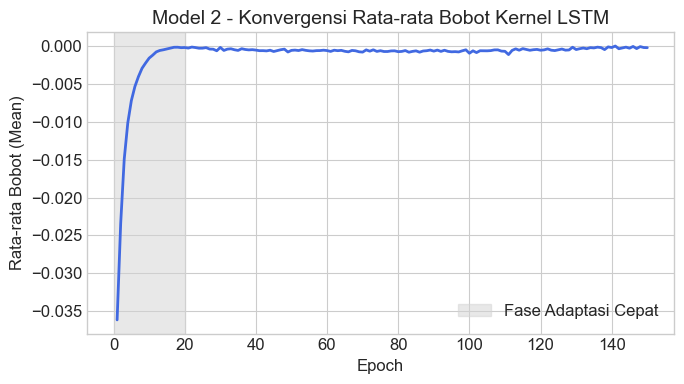

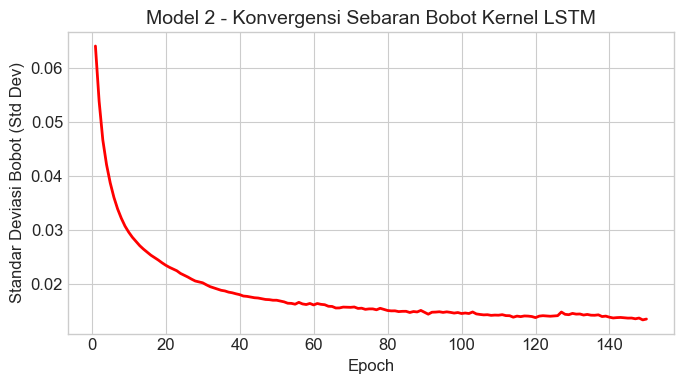

In [24]:
# Plot konvergensi bobot LSTM
weights_over_time = weight_callback.weights_history
mean_weights = [np.mean(w) for w in weights_over_time]
std_weights = [np.std(w) for w in weights_over_time]
epochs_trained = range(1, len(mean_weights) + 1)

plt.figure(figsize=(7, 4))
plt.plot(epochs_trained, mean_weights, color='royalblue', linewidth=2)
plt.axvspan(0, 20, color='lightgray', alpha=0.5, label='Fase Adaptasi Cepat')
plt.title('Model 2 - Konvergensi Rata-rata Bobot Kernel LSTM')
plt.xlabel('Epoch')
plt.ylabel('Rata-rata Bobot (Mean)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(epochs_trained, std_weights, color='red', linewidth=2)
plt.title('Model 2 - Konvergensi Sebaran Bobot Kernel LSTM')
plt.xlabel('Epoch')
plt.ylabel('Standar Deviasi Bobot (Std Dev)')
plt.grid(True)
plt.tight_layout()
plt.show()

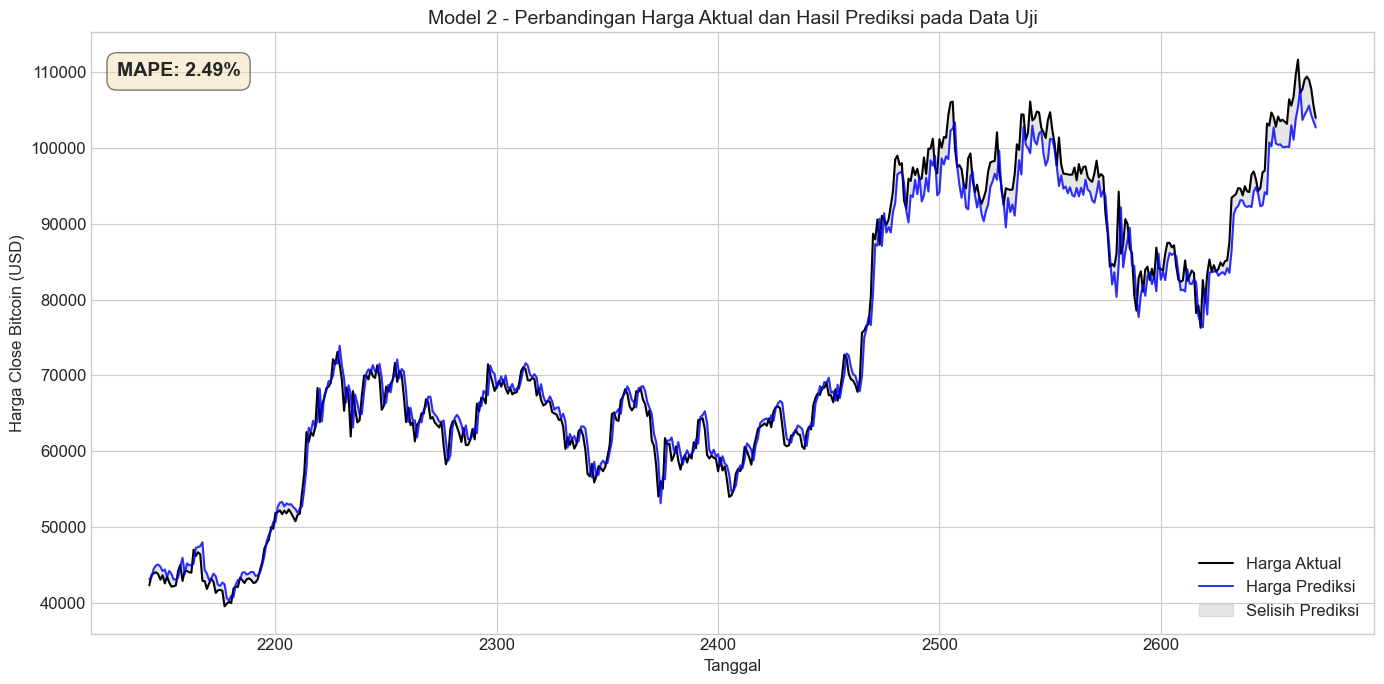

In [25]:
# Plot hasil prediksi vs aktual pada data uji
plot_dates = test_dates[best_seq_len:]
plt.figure(figsize=(14, 7))
plt.plot(plot_dates, y_test_actual, label='Harga Aktual', color='black', linewidth=1.5)
plt.plot(plot_dates, y_pred_actual, label='Harga Prediksi', color='blue', linewidth=1.5, alpha=0.8)
plt.fill_between(plot_dates, y_test_actual, y_pred_actual, color='gray', alpha=0.2, label='Selisih Prediksi')

plt.text(0.02, 0.95, f'MAPE: {test_mape:.2f}%', transform=plt.gca().transAxes,
         fontsize=14, fontweight='bold', verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.title('Model 2 - Perbandingan Harga Aktual dan Hasil Prediksi pada Data Uji')
plt.xlabel('Tanggal')
plt.ylabel('Harga Close Bitcoin (USD)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
final_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 128)                 │          69,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 207,749 (811.52 KB)

 Trainable params: 69,249 (270.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 138,500 (541.02 KB)